In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import datetime

In [3]:
cols = [i for i in range(22)]
df = pd.read_csv('19279_18.95_72.85_2000.csv', header = 2)
#df = df.groupby('Month').mean().drop(columns = ['Day', 'Hour', 'Minute', 'Year'])
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Snow Depth,Wind Direction,Wind Speed,Fill Flag
0,2000,1,1,0,30,0,0,0,0,0,...,19,24.715223,1009.309814,72.843278,175.061521,2.851512,0.0,320.300293,3.009070,0
1,2000,1,1,1,30,0,0,0,0,0,...,19,24.521887,1008.910156,74.167430,168.071685,2.646617,0.0,320.394531,3.292541,0
2,2000,1,1,2,30,0,0,0,0,0,...,19,24.349905,1008.644226,75.343149,154.494164,2.455227,0.0,325.300598,3.582074,0
3,2000,1,1,3,30,0,0,0,0,0,...,19,24.191913,1008.475281,76.066013,140.701235,2.269068,0.0,331.547729,3.798959,0
4,2000,1,1,4,30,0,0,0,0,0,...,19,24.086977,1008.798096,76.501451,126.949060,2.120765,0.0,337.871002,3.883848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2000,12,31,19,30,0,0,0,0,0,...,18,25.365345,1009.987000,65.754662,107.981715,3.645996,0.0,326.044403,2.940430,0
8756,2000,12,31,20,30,0,0,0,0,0,...,18,25.232327,1010.489807,68.103588,121.516857,3.567460,0.0,326.140472,2.807753,0
8757,2000,12,31,21,30,0,0,0,0,0,...,19,25.098040,1010.332764,69.512208,135.222755,3.439914,0.0,324.803253,2.719113,0
8758,2000,12,31,22,30,0,0,0,0,0,...,19,24.962195,1010.093933,70.547640,149.011630,3.263332,0.0,323.670990,2.716183,0


Text(0, 0.5, 'Solar Radiation ($w/m^2$)')

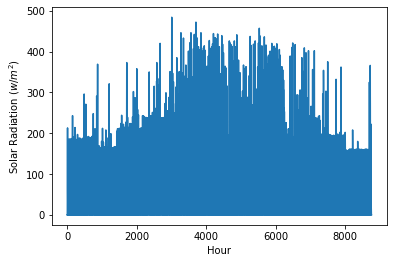

In [13]:
#See the change in radiation with seasons, implemented in the paper
plt.plot(df['DHI'])
plt.xlabel('Hour')
plt.ylabel("Solar Radiation ($w/m^2$)")

<IPython.core.display.Javascript object>


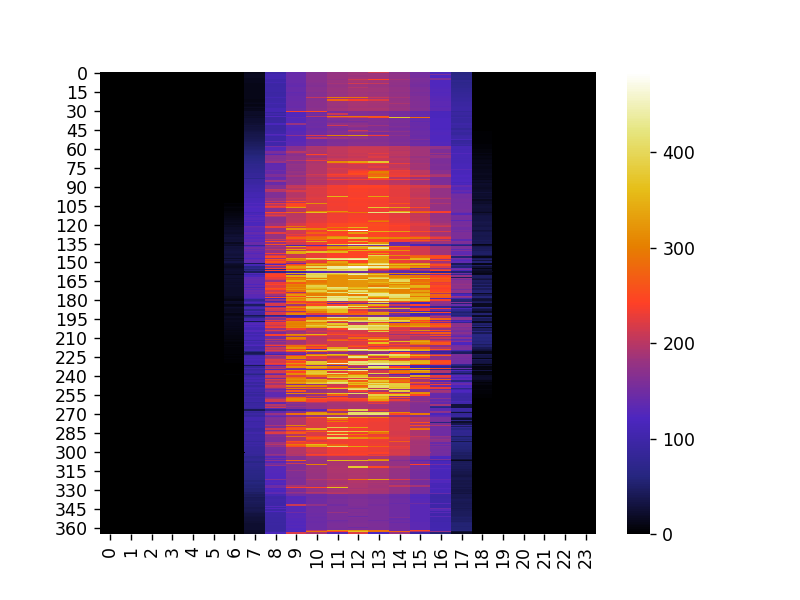

In [109]:
dates = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')
df['Day of Year'] = dates.dt.dayofyear
cols = [str(i) for i in range(1, 24)]
data = pd.DataFrame(columns = cols)
for group, val in df.groupby('Hour'):
    data[group] = val['DHI'].reset_index(drop=True)
#data = data.dropna(axis=0)
data = data.drop([ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'], axis=1)
data.head()
sns.heatmap(data.to_numpy(), cmap="CMRmap")